In [14]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore


# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=1

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
food_data = pd.read_csv('Nutrient Composition Dataset.csv')
df = food_data.copy()
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [7]:
df.drop('S.No', inplace=True, axis=1)

In [8]:
df.head()

,Protein,Fat,vitaminC,Fibre,Product
0,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [10]:
q1 = df['Protein'].quantile(0.25)
q3 = df['Protein'].quantile(0.75)
iqr = q3 - q1
print(iqr)

0.8592526325000001


<Axes: xlabel='Fat', ylabel='Count'>

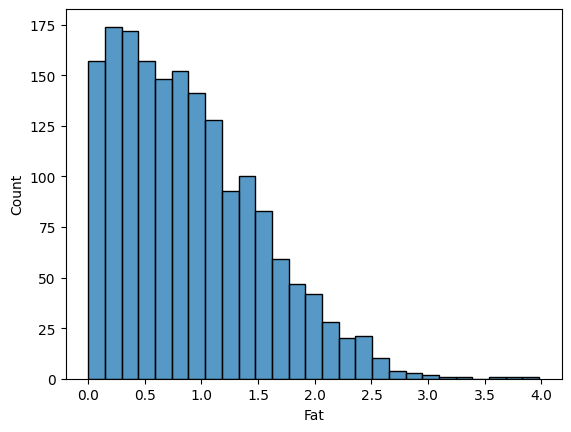

In [11]:
sns.histplot(data=df, x='Fat') 

<Axes: >

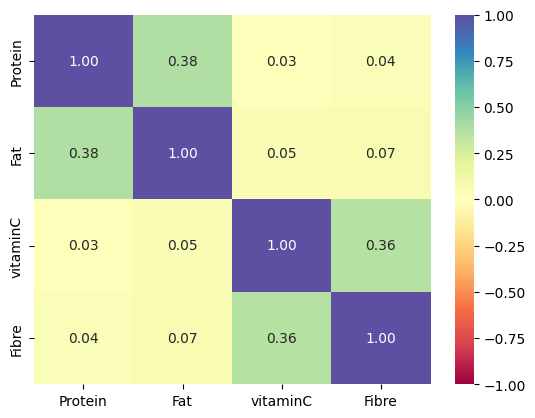

In [12]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


In [15]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
df[num_col] = zscore(df[num_col]) 

In [18]:
df.head()
df_nums = df[num_col]
df_nums.head()

,Protein,Fat,vitaminC,Fibre
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145


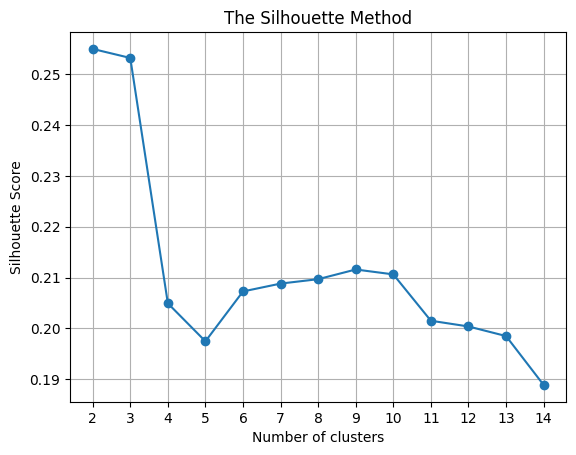

In [23]:
# calculate Silhouette Scores for a range of K values
sil_score = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 15):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(df_nums)

    # Calculate Silhouette Score
    score = silhouette_score(df_nums, clusterer.labels_)

    # Append the Silhouette Score to the sil_score list
    sil_score.append(score)

# Plot the Silhouette Scores against the number of clusters
plt.plot(range(2, 15), sil_score, marker='o')
plt.title('The Silhouette Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('Silhouette Score')  # Label the y-axis
plt.xticks(range(2, 15))  # Set the x-ticks from 2 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

In [24]:
clusterer = KMeans(n_clusters=3, random_state=RS)

clusterer.fit(df_nums)


df_nums['Clusters'] = clusterer.labels_

In [26]:
df_nums.head()

,Protein,Fat,vitaminC,Fibre,Clusters
0,-0.749825,0.426892,0.287212,1.279936,0
1,2.230835,-0.304578,-0.881972,-0.387079,1
2,-0.060478,0.451551,2.450659,1.729280,0
3,-0.330121,-0.508314,-1.008903,-0.848201,2
4,-1.259850,-0.560451,-1.255896,-0.548145,2


In [40]:
len(df_nums[df_nums['Clusters'] == 1])

487